# Introduction to NumPy

Handy cheatsheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

### Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib widget

## Function to visualize arrays

In [3]:
def view_array(data,alpha=1.0,text=True):

    if len(data.shape) > 4:
        print("Sorry, can't process >4-dimensional input array")
        return None
    while len(data.shape) < 4:
        data = np.expand_dims(data,0)

    i_arr, j_arr, k_arr = np.indices(data.shape[:-1])

    shape = list(data.shape[:-1]) #can only visualize up to 3 dimensions
    if data.shape[-1] == 4:
        colors = data
    elif data.shape[-1] == 3:
        colors = np.concatenate((data,np.full(shape + [1],alpha)),axis=-1)
    else:
        if np.max(data) <= 1 and np.min(data) >=0:
            opacity = data
        elif np.ptp(data) > 0:
            opacity = (data - min(data))/np.ptp(data)
        elif np.max(data) != 0:
            opacity = 0.9*data/max(data)

        #opacity = np.clip(opacity,0,1.0)

        colors = (np.ones(shape + [3]))
        colors = np.concatenate((colors,opacity),-1)

    ### normalize colors if necessary:
    if np.max(colors[...,:3]) > 1 or np.min(colors[...,:3]) < 0:
        colors[...,:3] = colors[...,:3] - np.min(colors[...,:3])
        colors[...,:3] = colors[...,:3]/np.max(colors[...,:3])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'{shape[0]} x {shape[1]} x {shape[2]} array')
    ax.set_proj_type('ortho')
    ax.set_box_aspect((max(np.ptp(i_arr),1), max(np.ptp(j_arr),1), max(np.ptp(k_arr),1)))
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    visible_mask = colors[...,3] > 0
    ax.voxels(visible_mask, edgecolors = 'black', facecolors = colors)

    if text:
        for i,j,k in zip(i_arr.flatten(), j_arr.flatten(), k_arr.flatten()):
            label = f'{i}{j}{k}'
            ax.text(i+0.3,j+0.3,k+0.3, label, None)

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('k')


## 1) Fun with arrays

### Creation

In [4]:
### From list:
my_list = [[1,23,2],
           [56,789,10]]
my_arr = np.array(my_list)

In [5]:
my_arr.shape

(2, 3)

In [6]:
### Constant:
full_arr = np.full((2,3,2),926.2)
full_arr

array([[[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]],

       [[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]]])

In [7]:
### Random:
rand_arr = np.random.random((2,3,2))
rand_arr

array([[[0.04554955, 0.46837471],
        [0.1824231 , 0.47940522],
        [0.21823957, 0.07230662]],

       [[0.80136034, 0.41268903],
        [0.53667903, 0.92549204],
        [0.17205359, 0.76515135]]])

In [8]:
### Zeros / ones:
zeros_arr = np.zeros((3,2,4))
ones_arr = np.ones((5,3,3,1))

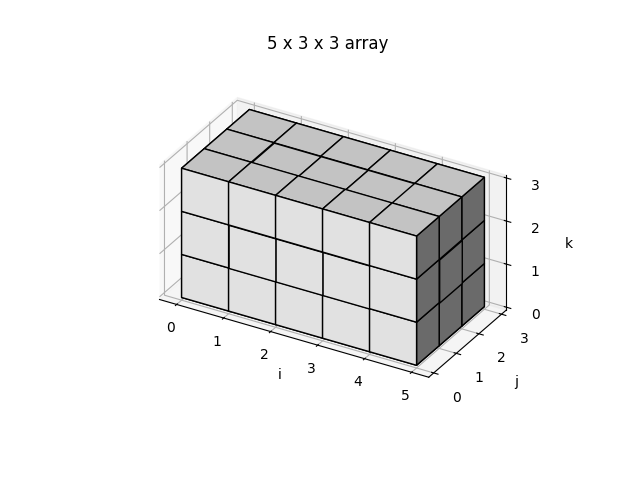

In [9]:
view_array(ones_arr)

### Properties

In [10]:
ones_arr.shape

(5, 3, 3, 1)

In [11]:
ones_arr.size

45

In [12]:
ones_arr.dtype

dtype('float64')

### Math

In [13]:
apple = ones_arr.copy()
apple = 0.6*apple

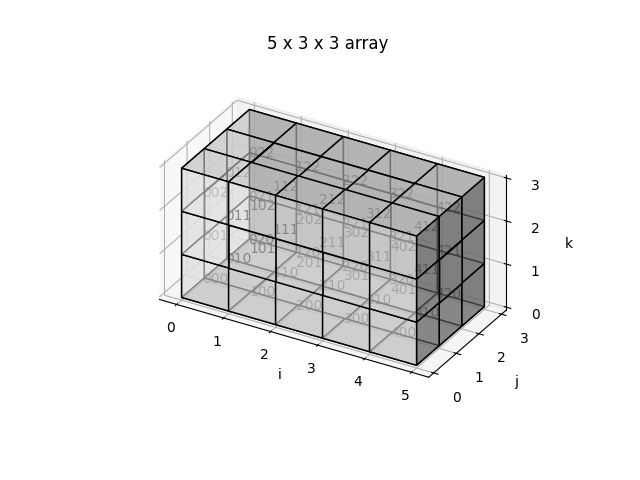

In [14]:
view_array(apple)

### Assignment
Let's try to "hide" two of the boxes

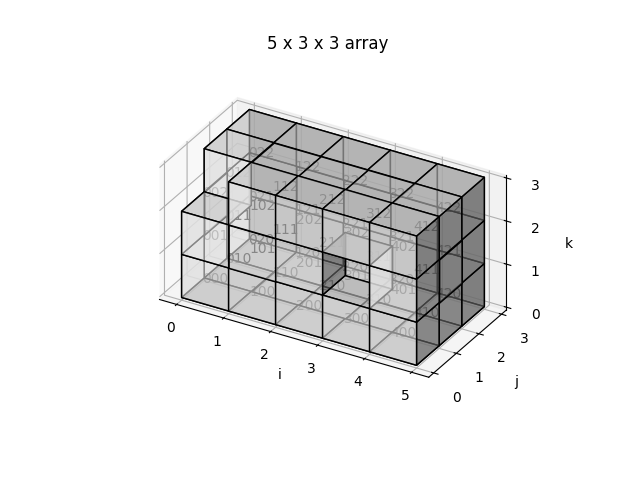

In [15]:
apple[3,0,1] = 0
apple[0,0,2] = 0
view_array(apple)

### Logic

In [16]:
greater_than_half = apple > 0.5
apple = np.where(greater_than_half,
                  0.0,
                  0.9)

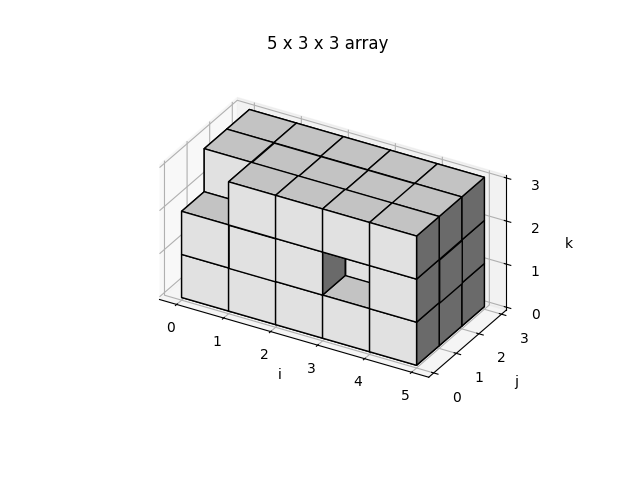

In [17]:
view_array(apple == 0)

### Slicing (selecting)

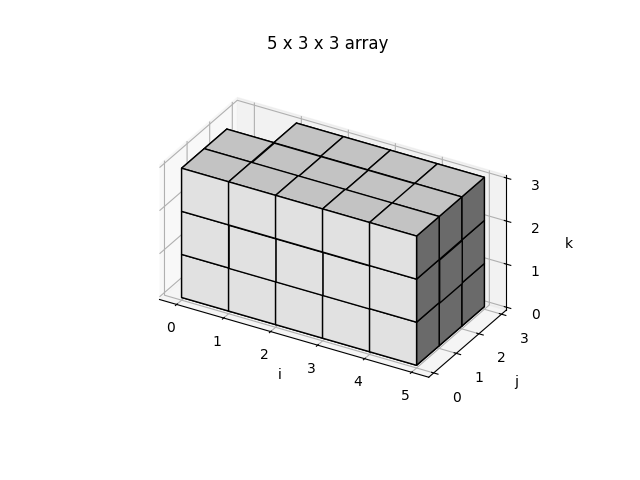

In [18]:
apple = ones_arr.copy()
apple[0,-1,:] = 0
view_array(apple)

### Reshaping

In [19]:
apple = ones_arr.copy()
print(apple.shape)

(5, 3, 3, 1)


In [20]:
apple = apple.reshape(1,15,3,1)

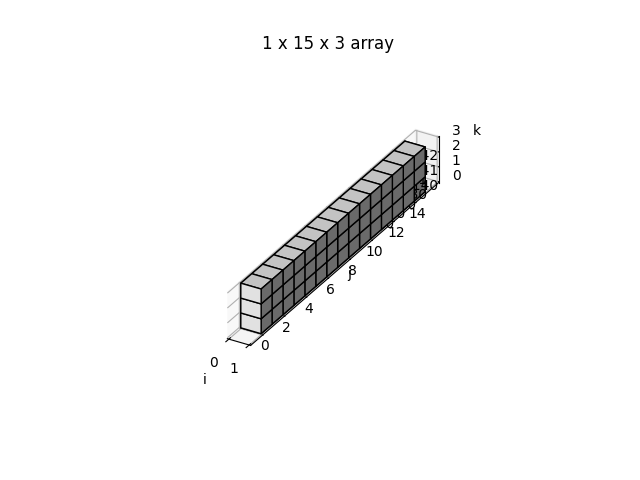

In [21]:
view_array(apple)

## 2) Making an actual apple

### It should be:
- red
- round

In [22]:
red_RGBa = [1,0,0,0.8] # = [R, G, B, alpha]

# Construct an array by repeating "red" the number of times for each dimension given by the second argument
apple = np.tile(red_RGBa,(15,15,15,1))

In [23]:
apple.shape

(15, 15, 15, 4)

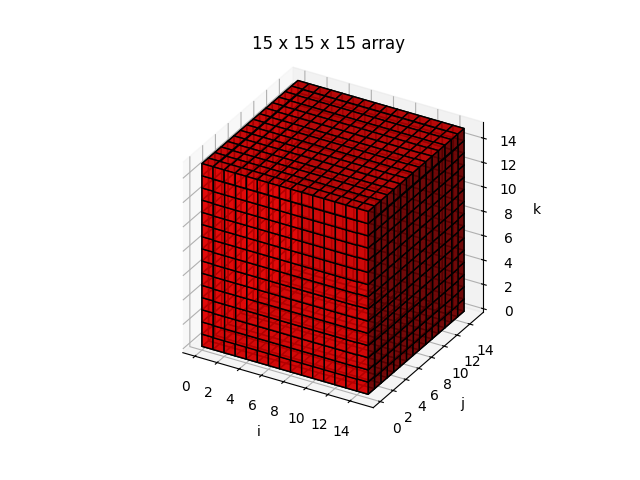

In [24]:
view_array(apple,text=False)

In [25]:
# for each box we have three values: i, j, and k
# (also each box has a color, which is a 4-tuple (R, G, B, alpha), but we don't need that here)
i, j, k, c = np.indices(apple.shape)

In [26]:
# each index array has the exact same shape as "apple", but stores the corresponding i, j, or k value
print(i.shape)

(15, 15, 15, 4)


In [27]:
# let's make it round by removing the corners
diameter = np.mean(apple.shape[:-1])
distance = (i - np.mean(i))**2 + (j - np.mean(j))**2 + (k - np.mean(k))**2
corner_mask = distance > 1.1*(diameter/2)**2

In [28]:
# now make the corners transparent
apple = np.where(corner_mask,[1,0,0,0],[1,0,0,1])

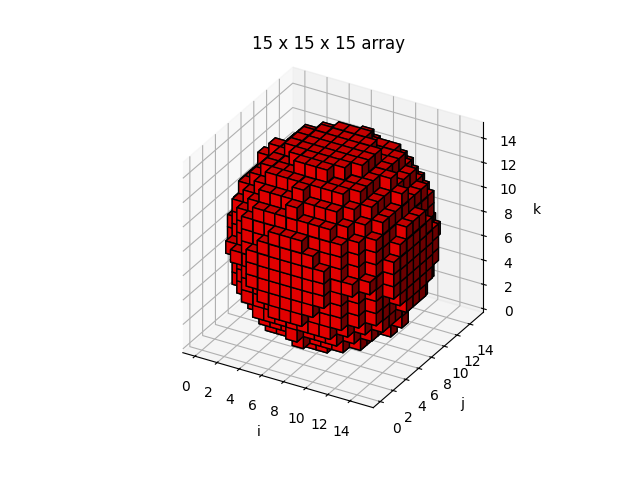

In [29]:
view_array(apple,text=False)

### Can we slice the apple?

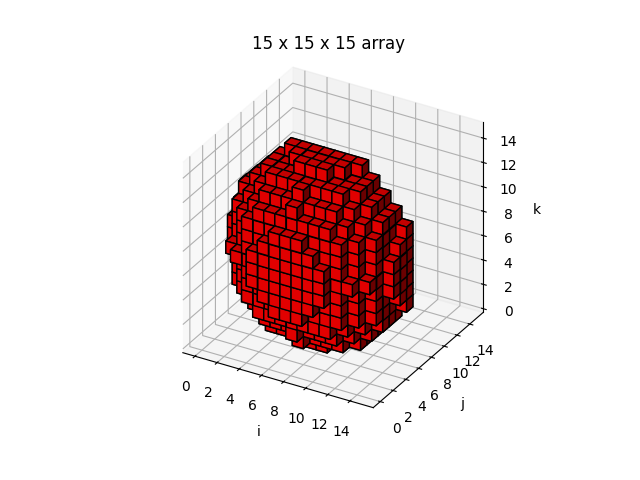

In [30]:
# Make the second half of the j dimension transparent
half_apple = apple.copy()
half_apple[:,7:,:] = [1,0,0,0]
view_array(half_apple, text=False)

## 3) Combining apple and orange

In [31]:
orange_RGBa = [247/256, 162/256, 17/256, 1.0]
orange = np.tile(orange_RGBa,(15,15,15,1))

In [32]:
# make it round like the apple, using same corner_mask
orange = np.where(corner_mask,[1,0,0,0],orange)

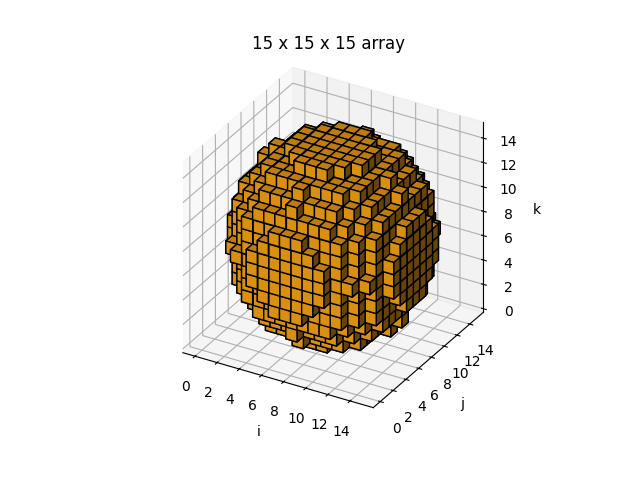

In [33]:
view_array(orange,text=False)

### Concatenate

In [34]:
# this is identical to np.hstack((apple,orange))
fruits = np.concatenate((apple,orange),axis=1)

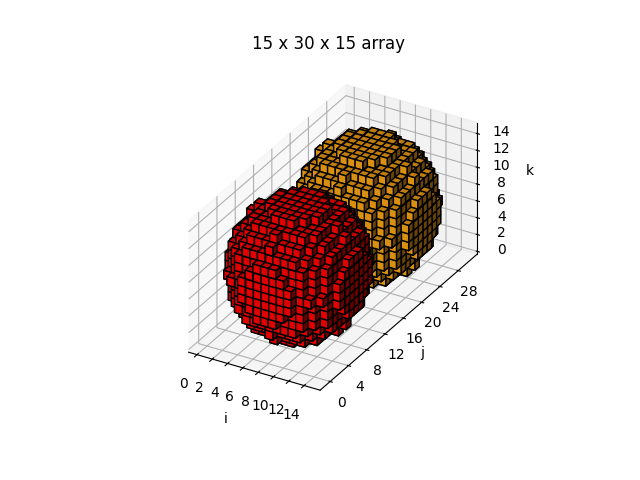

In [35]:
view_array(fruits,text=False)

### Half-and-half

In [36]:
fruits.shape

(15, 30, 15, 4)

In [37]:
# if we want to reshape the array so that the dimension-0 (i) is the long one, 
# numpy will have to slice dimension-1 (j) into two halves, 
# and concatenate them along dimension-0 (i)
# that's why we see along dimension-0 (i) a pattern of apple-orange-apple-orange-...
fruit_salad = fruits.reshape(30,15,15,4)

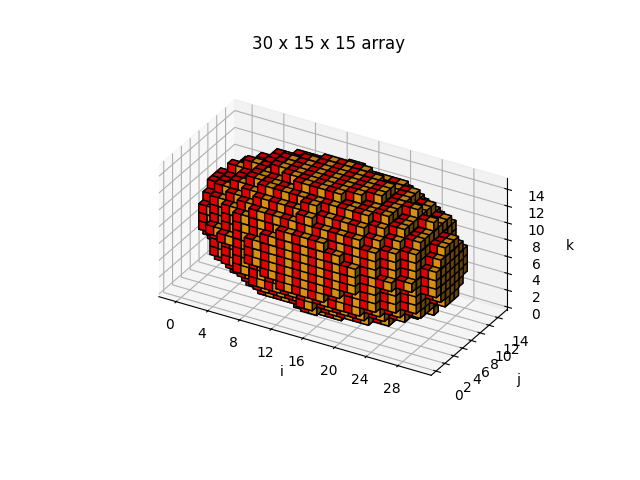

In [38]:
view_array(fruit_salad,text=False)

### Split

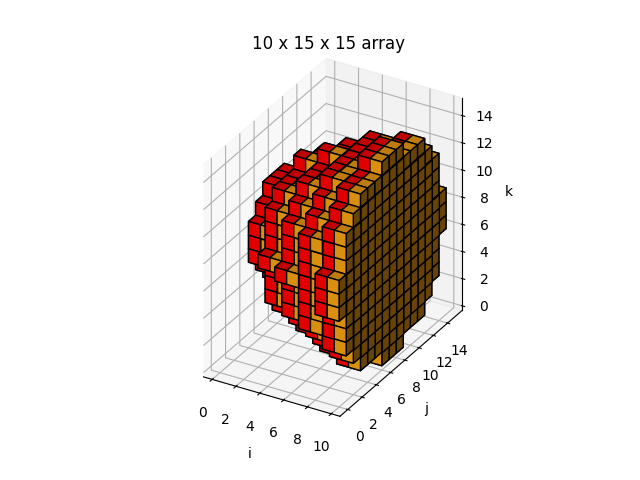

In [39]:
fruit_serving_1, fruit_serving_2, fruit_serving_3 = np.split(fruit_salad,3,axis=0)
view_array(fruit_serving_1,text=False)

### Can we separate out the 1/3 orange and 1/3 apple?

In [40]:
fruit_serving_1.shape

(10, 15, 15, 4)

In [41]:
# let's do the opposite of the reshape we did above which interleaved the apple and orange.
# again we want dimension-1 to be of length 30 (i.e. 2x), so we need to slice dimension-0 into two halves
fruit_serving_separated = fruit_serving_1.reshape(5,30,15,4)

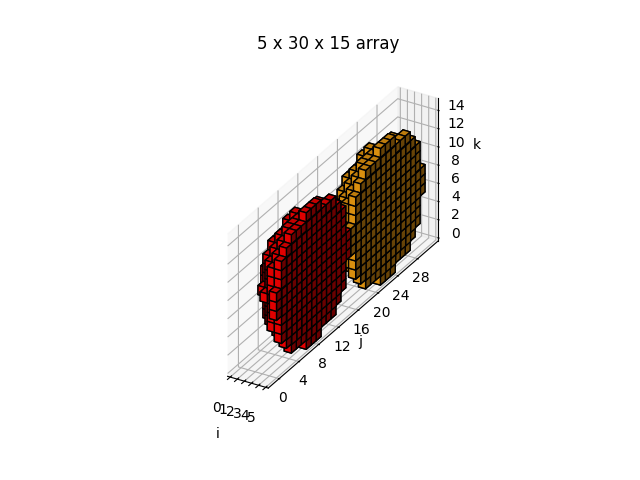

In [42]:
view_array(fruit_serving_separated,text=False)

### Matrix-multiply

In [43]:
# This is a rotation matrix which will operate on the RGB values
def get_z_rotation_matrix(theta):
    mat = [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta),  np.cos(theta), 0],
            [0,          0,                 1],
        ]
    return np.array(mat)

In [44]:
print(red_RGBa)
print(orange_RGBa)

[1, 0, 0, 0.8]
[0.96484375, 0.6328125, 0.06640625, 1.0]


In [45]:
z_rotation_matrix = get_z_rotation_matrix(np.pi/2)

In [46]:
print(z_rotation_matrix)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


In [47]:
# we only want to operate on the (R,G,B) values, not the alpha, 
# so we first slice the array to separate them out:
colors_only = fruit_serving_separated[...,:-1]
alphas_only = fruit_serving_separated[...,3:]
# note that "..." is numpy shorthand for "all dimensions before this"

In [48]:
# now multiply with the rotation matrix
new_colors = np.matmul(colors_only,z_rotation_matrix)

In [49]:
# rejoin the new colors and the alphas
fruit_serving_recolored = np.concatenate((new_colors,alphas_only),axis=-1)

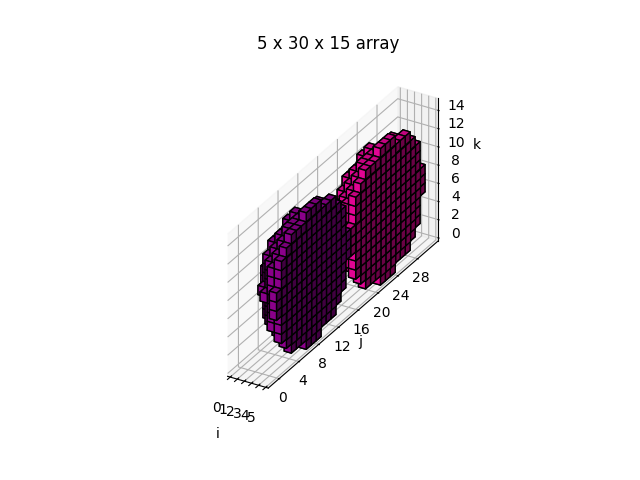

In [50]:
view_array(fruit_serving_recolored,text=False)

## 4) Bonus: Pseudo-Rubix cube

In [51]:
rubix_cube = np.random.random((3,3,3,3))

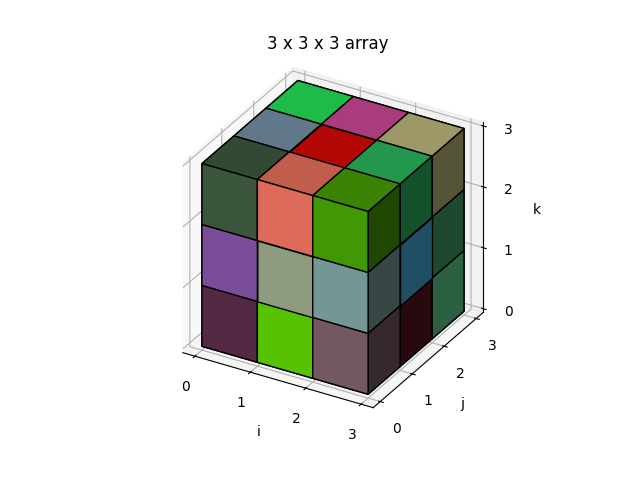

In [52]:
view_array(rubix_cube,text=False)